# Команда
* Безкоровайный Павел
* Долматов Дмитрий
* Коряков Сергей

Ссылка на R-collab: https://colab.research.google.com/drive/1LEnC0ngE2CUGvJHh5w4fa5WF5pvd4Bin?usp=sharing

# Описание задания

## Задание 3

Выполняется в парах. Допускается выполнение в группах по 3 человека.

1. Выберите 2-3 датасета для анализа. Большой список источников датасетов можно найти здесь: [https://r-dir.com/reference/datasets.html](https://r-dir.com/reference/datasets.html), но можно выбрать любой другой.
2. Оцените и опишите выбранные датасеты: какие в них представлены данные, в каких шкалах они измерены, сколько строк и признаков. Это удобно сделать в виде небольшой таблицы с колонками «Признак», «Тип данных», «Шкала». Кратко опишите, для каких задач датасет подойдет, а для каких – нет.
3. Выдерите один датасет для анализа.
4. Сформулируйте 16 различных гипотез относительно содержания данных.
5. 8 любых гипотез проверьте на R, 8 оставшихся – при помощи pandas.
6. Каждая визуализация-проверка должна содержать вывод: что наблюдаем, подтвердилась ли гипотеза.
7. Загрузите отчет на Piazza. Можно в формате Google Colab или html-версии R Markdown. Пункт 2 можно оформить отдельным документом или добавить в один из блокнотов. Достаточно, чтобы отчет загрузил один человек из пары/команды, но не забудьте указать всех авторов.

# Правила совместной работы
1. Перед закрытием коллаба убедиться, что все данные сохранены. Для этого откройте тот же коллаб в отдельном окне.
2. Все библиотеки, которые используются более, чем в одном блоке кода, выносить в отдельный блок с подключением библиотек.
3. Все используемые файлы загружать в виде ссылок. Для этого (на примере гугл диска):
  1. Загружаем файл себе на гугл диск, нажимаем `открыть доступ`, создаём ссылку.
  2. Полученную ссылку преобразуем в ссылку для скачивания, например через сервис https://www.votix.ru/p/sozdat-pryamuyu-ssylku-fajla-google-disk.html 
  3. Читаем файл по сгенерированной ссылке с помощью команды `pd.read_csv("ссылка")`

4. В начале каждого блока, копируем используемые датасеты с помощью метода copy(), чтобы каждый блок кода был самостоятельным.
  * В Р вместо метода copy используется оператор стрелочка
  * `new_copy <- suicides`

#Библиотеки и данные

In [ ]:
# подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
import pycountry
import pycountry_convert as pyconv

In [ ]:
!pip install pycountry
!pip install pycountry-convert

In [ ]:
# загрузка датасетов
beijing_houses = pd.read_csv("https://drive.google.com/uc?export=download&confirm=no_antivirus&id=17HSbU0GqREmA4Zrtyc5enWePE5EJ5ji9", encoding = "ISO-8859-1")
uk_fires = pd.read_csv("https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1MmdMpYqcQsqVNO8rVHsXlcHfxcDZo5Fu")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
suicides = pd.read_csv("https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1QsLLJxDR1nVTY3S1YvUBOPqZiHsctfiy")

# Выбор датасетов

Датасеты, выбранные для анализа:
* Пожары в Англии: https://www.kaggle.com/datasets/timmofeyy/-fire-cases-in-uk-within-last-3-years
* Цены на жильё в Пекине: https://www.kaggle.com/datasets/ruiqurm/lianjia
* Самоубийства (1985-2016): https://www.kaggle.com/datasets/sadiqshah/suicides-rate-1985-to-2016

##Жилье в Шанхае

In [ ]:
bh = beijing_houses.copy()
bh=bh.dtypes.to_frame()
bh.columns=["Тип данных"]
bh["Шкала"] = ["Ссылка на пост", "ID транзакции", "Долгота", "Широта", "ID сообщества", "Дата транзакции (ГГ-ММ-ДД)", 
               "Возраст листинга недвижимости (в днях)", "Кол. следящих за транзакцией", "Итог. цена, $", "Цена за кв.метр, $", 
               "Площадь, в м^2", "Кол. жилых комнат", "Кол. гостиных", "Кол. кухонь", "Кол. ванных комнат", "Высота дома (в футах)", 
               "Тип постройки", "Год постройки", "Cостояние ремонта", "Материал постройки", "Среднее количество лестниц на жителя", 
               "Нал. лифта (0 - нет)", "Прошлое владение 5 лет", "Нал. метро", "Район", "Средняя цена, $" ]
bh.index.name ="Признак"
bh

,Тип данных,Шкала
Признак,,
url,object,Ссылка на пост
id,object,ID транзакции
Lng,float64,Долгота
Lat,float64,Широта
Cid,int64,ID сообщества
tradeTime,object,Дата транзакции (ГГ-ММ-ДД)
DOM,float64,Возраст листинга недвижимости (в днях)
followers,int64,Кол. следящих за транзакцией
totalPrice,float64,"Итог. цена, $"


In [ ]:
beijing_houses.sample(5)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
216964,https://bj.lianjia.com/chengjiao/BJDX91342133....,BJDX91342133,116.450891,39.822298,1111027378846,2016-05-11,1.0,57,368.0,28764,...,3.0,2005,3,6,0.500,1.0,1.0,0.0,4,49957.0
298067,https://bj.lianjia.com/chengjiao/BJXC84936233....,BJXC84936233,116.391726,39.978788,1111027382272,2012-12-01,NaN,0,230.0,43727,...,4.0,1983,1,2,0.250,0.0,1.0,1.0,10,121898.0
208870,https://bj.lianjia.com/chengjiao/BJDX84793220....,BJDX84793220,116.460643,39.806976,1111027378386,2012-08-12,NaN,0,225.0,18351,...,3.0,2001,1,6,0.500,1.0,1.0,0.0,4,44850.0
268137,https://bj.lianjia.com/chengjiao/BJHD92245933....,BJHD92245933,116.364365,40.069487,1111027382307,2016-05-30,NaN,20,519.0,44788,...,3.0,2004,4,6,0.500,1.0,1.0,1.0,8,64750.0
222453,https://bj.lianjia.com/chengjiao/BJFT84690408....,BJFT84690408,116.426617,39.867648,1111027377942,2012-08-15,NaN,0,183.0,26849,...,3.0,1998,1,6,0.286,1.0,1.0,1.0,2,52774.0


Данный датасет подойдет для задач прогнозирования цены на недвижимость в дальнейшей перспективе (из-за достаточного горизонта обучающих данных). Разграничители по типу: наличие метро, количество комнат, лифтов оказывает непосредственное влияние на цену такого жилья.

Однако использовать эту информацию для прогноза с горизонтом 20-30 лет крайне не рекомендуется, поскольку демография и ситуация с ковидом довольно сильно изменит вероятность угадывания нашей системы.

Также датасет подходит для визуализации временных данных о торгах и отображении различных геоданных на основе представленных в таблицах зависимотях


В датасете есть проблема с унификацией типов данных и их описанием - в источнике нету корректного описания неокторых столбцов, а некоторые столбцы содержат несоотвествующие формату значения, поэтому было решено не использовать этот датасет.

### Предполагаемые Гипотезы

 

1. Стоимость квартиры с где кухонь больше чем гостинных выше, нежели чем в квартирах, где гостинных больше чем кухонь
2. Одни типы построек преобладают по отношению к другим в зависимости от периода постройки
3. Размер среднего количества лестниц на жителя увеличивает цену жилплощади
4. В центральных районах лифтов меньше, чем в окрайнах
5. Высота дома влияет на общее число комнат в доме (чем выше высота тем их меньше)
6. Наличие лифта в доме больше влияет на цену, чем наличие метро
7. В квартирах с владением больше пяти лет цена выше, нежели чем в квартирах, которыми владеют меньше 5 лет
8. Количество следящих за транзакциями в центре города выше, чем в окраинах
9. Количество ванных комнат влияет на тип постройки
10. Зданий из дерева и кирпича больше всего относительно других типов
11. Наличие ванной комнаты преобладает в зданиях из плит
12. Количество зданий рядом с метро больше, нежели зданий у которых рядом метро нет

##Пожары в Англии

In [ ]:
fires = uk_fires.copy()
fires=fires.dtypes.to_frame()
fires.columns=["Тип данных"]
fires["Шкала"] = ["Номер инцидента", "Дата звонка", "Год звонка", "Время звонка", "Час звонка", "Категироя инцидента",
                  "Причина остановки звонка", "Тип спецслужбы", "Категория имущества", "Сгоревшее имущество",
                  "Тип адреса", "Почтовый индекс", "Почтовый индекс района", "Уникальный справочный номер объекта",
                  "Уникальный идентификационный номер улицы", "Код района", "Название района", "Название района (правильный регистр)",
                  "Код района", "Название района", "Название района (новое имя)", "Восточный медиан", "Северная широта",
                  "Восточный медиан (округленный)", "Северная широта (округленная)", "Широта", "Долгота", "FRS", "Пожарная станция",
                  "Время прибытия первой машины", "Станция первой машины", "Время прибытия второй машины", "Станция второй машины",
                  "Количество учавстсвовавших станций", "Количество учавстсвующих машин", "Количество машин", "Количество часов", "Стоимость", "Количество звонков"]
fires.index.name ="Признак"
fires

,Тип данных,Шкала
Признак,,
IncidentNumber,object,Номер инцидента
DateOfCall,object,Дата звонка
CalYear,int64,Год звонка
TimeOfCall,object,Время звонка
HourOfCall,int64,Час звонка
IncidentGroup,object,Категироя инцидента
StopCodeDescription,object,Причина остановки звонка
SpecialServiceType,object,Тип спецслужбы
PropertyCategory,object,Категория имущества


In [ ]:
uk_fires.sample(5)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
115610,017266-09022020,09 Feb 2020,2020,16:12:45,16,Special Service,Special Service,Making Safe (not RTC),Outdoor,Tree scrub,...,190.0,Harrow,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
115445,017001-09022020,09 Feb 2020,2020,11:52:46,11,Special Service,Special Service,Making Safe (not RTC),Dwelling,House - single occupancy,...,332.0,Whitechapel,NaN,NaN,1.0,1.0,1.0,2.0,678.0,1.0
327997,024156-18022022,18 Feb 2022,2022,14:18:47,14,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,376.0,Hayes,526.0,Northolt,2.0,2.0,2.0,1.0,352.0,9.0
85156,144542-24102019,24 Oct 2019,2019,09:27:13,9,Special Service,Special Service,Effecting entry/exit,Non Residential,Train station - platform (below ground),...,342.0,Paddington,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
325131,019188-10022022,10 Feb 2022,2022,00:56:22,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,441.0,Beckenham,NaN,NaN,1.0,1.0,1.0,1.0,352.0,1.0


Данный датасет описывает пожары в Великобритании за три 2019-2022 года. Датасет подойдёт для прогнозирования пожаров в стране на будущее, и поможет грамотно распределить количество используемой техники по пожарным станциям.

Датасет содержит достаточно много столбцов избыточной и дублироемой информации, что может стать причиной нарушения целостности данных, так что рекомендуется сделать предобработку данных

Добавим предполагаемые гипотезы, с помощью которых картина причин и исходов пожаров станет более ясной:
1. 2020 - ковидный год. Меньше людей выходило на улицы -> меньше шансов позвонить и предупредить о том, что на улице произошел пожар.
2. Пожары зачастую возникают в летнее время суток на кораблях на выходных.
3. Звонки пожарникам поступают в вечернее время, когда люди приходят с работы и могут физически позвонить + ночью ложатся спать (бдительность падает)
4. Ложная тревога возникает чаще тогда, когда человек более активен (день-вечер + выходные)
5. Пожарная тревога чаще срабатывает, когда пожар внутри помещения + чаще не срабатывает, когда пожар на улице
6. Cигналка чаще обнаруживает пожар по выходным (датчик) Special Service в домах*
7. Недвижимость горит чаще в выходные.
8. В пятинцу из-за более короткого рабочего дня количество пожаров в квартирах на 1-2 часа увеличивается
9. Время прибытия пожарной машины в северных регионах страны ниже, чем в более населенных южных.
10. В доме, в которых живет один человек, вероятность срабатывания пожарной системы ниже, чем в более населенных домах (особенно во время рождества)
11. В самолетах и лодках чаще всего сигнальная тревога срабатывает летом из-за ошибочного солнечного воздействия на приборы (преломление и пр.)
12. Затопления происходят чаще всего летом
13. Затопления происходят там, где находятся дома.
14. Интервал между двумя прибытиями пожарных машин больше тогда, когда причиной пожара является срабатывание сигнализации
15. Лодки людей, которые живут на северных территориях, тушат намного реже, а значит они догорают.
16. Животных чаще применяют в ночное время суток зимой, когда человеческие рефлексы наиболее менее чувствительны

К сожалению, в данном датасете присутствует достаточно много лишней и повторяющейся информации. Размах случаев слишком велик для анализа такого огромного количества факторов. Единственный возможный вариант - локализация своего взгляда на чем-то более конкретном.

## Самоубийства

In [ ]:
suicide = suicides.copy()
suicides_describe=suicide.dtypes.to_frame()
suicides_describe.columns=["Тип данных"]
suicides_describe["Шкала"] = ["Страны", "Года", "Пол (м/ж)", "Возраст (в диапозонах)", "Количество самоубийств", "Чел.", "Шт. на 100 тыс. население","Год-Страна" ,"Индекс счастья (0-100)" ,"ВВП годовой, $","ВВП на душу, $","Наименование поколений"]
suicides_describe.index.name ="Признак"
suicides_describe

,Тип данных,Шкала
Признак,,
country,object,Страны
year,int64,Года
sex,object,Пол (м/ж)
age,object,Возраст (в диапозонах)
suicides_no,int64,Количество самоубийств
population,int64,Чел.
suicides/100k pop,float64,Шт. на 100 тыс. население
country-year,object,Год-Страна
HDI for year,float64,Индекс счастья (0-100)


In [ ]:
suicides.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gpy,gdp_per_capita,generation
13800,Kazakhstan,1995,male,15-24 years,622,1455600,42.73,Kazakhstan1995,0.664,"20,374,307,047",1359,Generation X
8148,El Salvador,1997,female,55-74 years,5,275078,1.82,El Salvador1997,NaN,"10,221,705,900",2065,Silent
3808,Belgium,2015,female,25-34 years,45,726357,6.20,Belgium2015,NaN,"455,039,563,133",42830,Millenials
20229,Qatar,2016,male,75+ years,0,6093,0.00,Qatar2016,NaN,"152,451,923,077",62484,Silent
19492,Portugal,1996,male,25-34 years,52,742474,7.00,Portugal1996,NaN,"122,629,812,841",12887,Generation X


Данный дадатасет персдтавляет собой набор описательных признаков о самоубийствах в разных страннах, распределённый по годам начиная с 1985 заканчивая 2016 годом. Набор предоставляемых данных хорошо подойдет для визуализации и анализа, составления наглядной статистики и графики с изображениями как на карте, так и в классических типах диаграмм. 
Делать какие-либо предсказания по этому датасету или гипотезы, определяющее "реальное" положение дел в странах будет затруднительно. Так же в датасете представлено не так много данных, описывающих сами страны, поэтому какие-то большие закономерности или комплексные тренды посредством представленых данных описать или визуализировать не выйдет

### Предполагаемые гипотезы



1.	Женщины совершают самоубийства чаще мужчин
2.	Чаще всего самоубийства совершают подростки
3.	Для женщин характерны самоубиства в раннем возрасте, в то время как мужчины совершают больше самоубиств в позднем возрасте
4.	Среди континентов лидером по суицидам является Северная Америка
5.	Среди стран <континент победитель по суицидам> победителем по суицидам является США (или другая страна - если другой континент)
6.	Наблюдается рост числа самоубиств за последние 5 лет (если считать, что сегодня 2016)
7.	Есть корреляция между количеством самоубийств, численностью населения, индексом счастья и ВВП
  0.	Сделать выводы по пунктам ниже:
  1.	Чем больше численность, тем выше кол-во самоубиств на душу населения
  2.	Чем выше ВВП, тем больше самоубийств
  3.	Про счастье тоже
8.	В Африканских странах корелляция между уровнем счастья и количеством суицидов самая низкая по миру
9.	Новые поколения реже совершают самоубиства в раннем возрасте (до 25лет (может меньше, надо анализировать названия поколений и какие годы с ними ассоциируют)) Также можно уточнить, какие именно поколения.
  0.	Чем ближе дата подходим к "нашим дням" тем больше самоубийств смещается в сторону молодого поколения. В принципе можно и эту формулировку использовать
10.	Количество самоубийств среди девушек возраста от 15 до 24 года в странах Европейского Союза увеличилось в течение 10 лет
11.	Процентное соотношение самоубийств в странах ЕС, совершаемых мужчинами, увеличивается с течением их возраста (какой-нибудь swarmplot с hue бахнуть)
12.	В более южных странах процент суицидов превалирует на стороне женщин, а в северных на стороне мужчин (Бедные страны сложно брать, так как они примерно все в более теплых регионах).
13.	Cуициды в маленьких странах среди пожилого населения отсутствуют (минимальны)
14.	Россия входит в топ 10 европескийх стран по количеству самоубиств (на душу населения)
15.	В 2008 году из-за кризиса наблюдался рост числа самоубийств (по сравнению с близлежащими годами)
16.	Разница между количеством мужчин и женщин в странах с высоким индексом счастья не более 5%




---



# Гипотезы

## Гипотеза 9
Среди континентов лидером по суицидам является Северная Америка
`Павел`

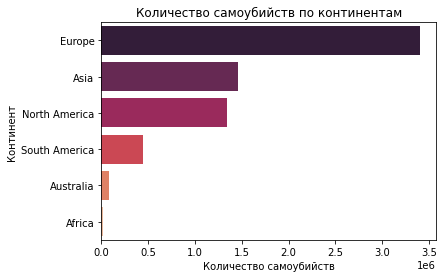

In [ ]:
suicide9=suicides.copy()

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

# приводим некоторые страны к стандарту pycountry
suicide9.loc[suicide9['country'] == 'Czech Republic', 'country'] = 'Czechia'
suicide9.loc[suicide9['country'] == 'Macau', 'country'] = 'Macao'
suicide9.loc[suicide9['country'] == 'Republic of Korea', 'country'] = 'Korea, Republic of'
suicide9.loc[suicide9['country'] == 'Saint Vincent and Grenadines', 'country'] = 'Saint Vincent and the Grenadines'

suicide9['country_2'] =  suicide9['country'].apply(lambda country: pycountry.countries.get(name=country).alpha_2) # получаем двухбуквенный код страны по её названию
suicide9['Continent'] =  suicide9['country_2'].apply(lambda country: continents[pyconv.country_alpha2_to_continent_code(country)]) # определяем континент по двухбуквенному коду страны
suicide9_1 = suicide9.groupby(by='Continent', as_index = False).sum()[['Continent', 'suicides_no']].sort_values(by='suicides_no', ascending=False) # вычисляем количество суицидов на континент

sns.barplot(y=suicide9_1.Continent, x=suicide9_1.suicides_no, palette='rocket')
plt.title("Количество самоубийств по континентам");
plt.xlabel("Количество самоубийств");
plt.ylabel("Континент");
plt.figsize=(100,100)

Гипотеза не подтвердилась. Отчётливо видно, что среди континентов лидером по суицидальным случаям является Европа. Северная Америка находится на третьем месте, с небольшим отставанием от Азии

## Гипотеза 10
Среди стран Америки лидером по суицидальным случаям является США (Америка как часть света)
`Павел`

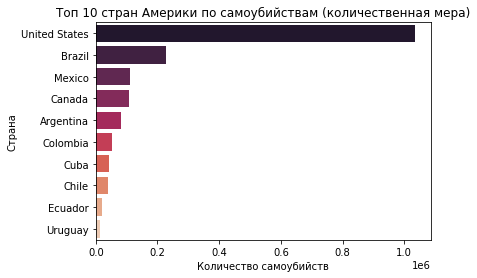

In [ ]:
suicide10=suicide9.copy()
suicide10 = suicide10[(suicide10['Continent'] == 'North America') | (suicide10['Continent'] == 'South America')]
suicide10 = suicide10.groupby(by='country', as_index = False).sum()[['country', 'suicides_no', 'suicides/100k pop']] # вычисляем количество суицидов на континент
suicide10_1 = suicide10.sort_values(by='suicides_no', ascending=False).head(10)

sns.barplot(y=suicide10_1.country, x=suicide10_1['suicides_no'], palette='rocket')
plt.title("Топ 10 стран Америки по самоубийствам (количественная мера)");
plt.xlabel("Количество самоубийств");
plt.ylabel("Страна");
plt.figsize=(200,200)

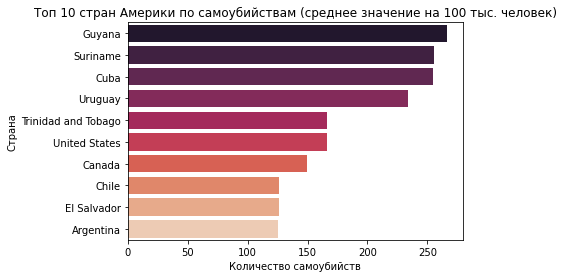

In [ ]:
suicide10=suicide9.copy()
suicide10 = suicide10[(suicide10['Continent'] == 'North America') | (suicide10['Continent'] == 'South America')]

suicide10 = suicide10.groupby(by=['country', 'year'], as_index = False).sum()[['country', 'suicides/100k pop']].rename(columns={'suicides/100k pop':'suicides100k'})
suicide10 = suicide10.groupby(by=['country'], as_index = False).mean()
suicide10_1 = suicide10.sort_values(by='suicides100k', ascending=False).head(10)

sns.barplot(y=suicide10_1.country, x=suicide10_1['suicides100k'], palette='rocket')
plt.title("Топ 10 стран Америки по самоубийствам (среднее значение на 100 тыс. человек)");
plt.xlabel("Количество самоубийств");
plt.ylabel("Страна");
plt.figsize=(200,200)

Гипотеза частично подтвердилась. Количественно в США происходит больше всего самоубийств. Однако если смотреть среднее количество самоубийств на 100 тысяч человек за весь период, то США смещается на шестое место. На первом же месте в таком случае оказываются страны: Гайана, Суринам, Куба

## Гипотеза 11
Существует корреляция между количеством самоубийств, численностью населения и ВВП `Сергей`
1.	Чем больше численность, тем выше кол-во самоубиств на душу населения
2.	Чем выше ВВП, тем больше самоубийств

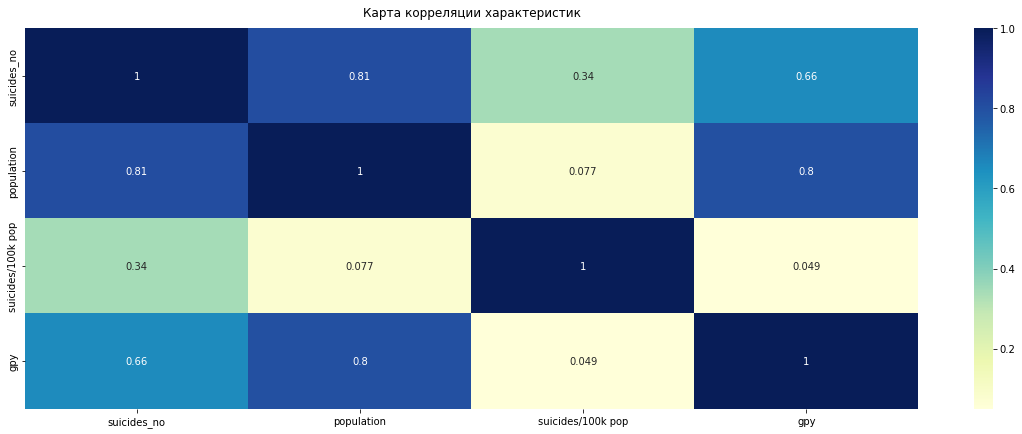

In [ ]:
suicide11=suicides.copy()
suicide11['gpy']=suicide11[' gpy'].str.replace(',','')
suicide11['gpy']=suicide11['gpy'].astype(int)


suicide11=suicide11.groupby(['country', 'year']).agg({"suicides_no":"sum", "population":"sum", "suicides/100k pop":"sum",  "gpy":"mean"})
corelate_matrix=suicide11.corr()
fig, axis = plt.subplots(1, 1, figsize=(20, 7))
sns.heatmap(ax=axis, data=corelate_matrix, annot=True, cmap="YlGnBu").set_title('Карта корреляции характеристик', fontdict={'fontsize':12}, pad=12);


Между ВВП и количеством самоубийств действительно существует положительная корелляция, хоть ее коэфициент и не слишком большой

А вот линейная зависимость численности наcления от количества самоубийств на душу населения, можно считать, отсутсвует

## Гипотеза 12
Страна с наибольшей  убылью населения (в %) по годам в период с 2000 по 2016 и страна с наибольшим количеством самоубийств на 100 тыс. населения по годам за этот же период не входят в топ 3 статистик друг друга (по убыли и самоубийствам)
`Сергей`

In [ ]:
suicide12=suicides.copy()
suicide12=suicide12[suicide12.year>=2000]
suicide12['gpy']=suicide12[' gpy'].str.replace(',','')
suicide12['gpy']=suicide12['gpy'].astype(int)
country_year=suicide12.groupby(['country', 'year']).agg({"suicides_no":"sum", "population":"sum", "suicides/100k pop":"sum",  "gpy":"mean"}).reset_index()
country_year["pct"]=country_year.groupby(['country'])['population'].pct_change()

#country_population=first_value.nlargest(3, "percent_diff").index

country_max_suicides=country_year.groupby(['country',]).max().nlargest(3, "suicides/100k pop").index

#country_year[country_year["country"].isin(country_max_suicides)]
country_max_change_pop=country_year.groupby(['country',]).max().nsmallest(3, "pct").index

countries_pct=country_year[country_year.country.isin(country_max_change_pop)]
countries_100k=country_year[country_year.country.isin(country_max_suicides)]

Text(0.5, 1.0, 'Изменение % оттока населения по годам')

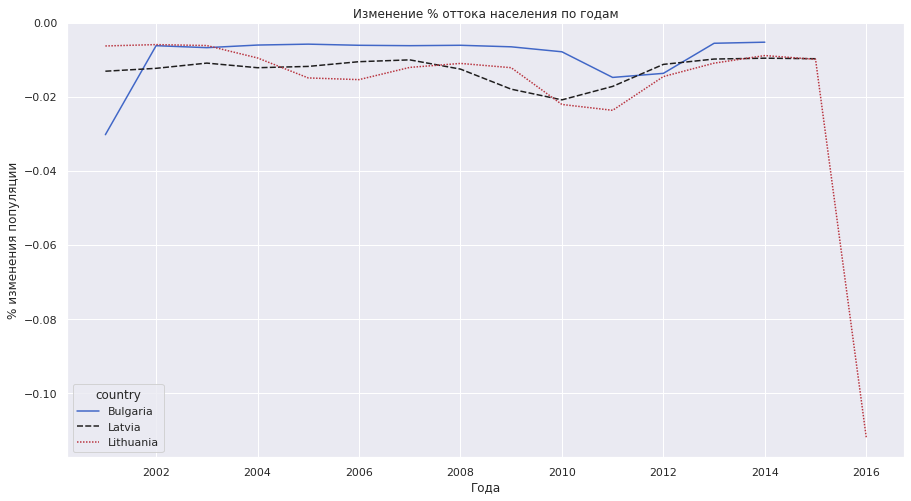

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})

p = sns.lineplot(data=countries_pct, x="year", y="pct", hue="country", style="country",palette="icefire" )
p.set_xlabel("Года")
p.set_ylabel("% изменения популяции")
p.set_title('Изменение % оттока населения по годам')

Text(0.5, 1.0, 'Изменения кол-ва самоубийств на 100к по годам')

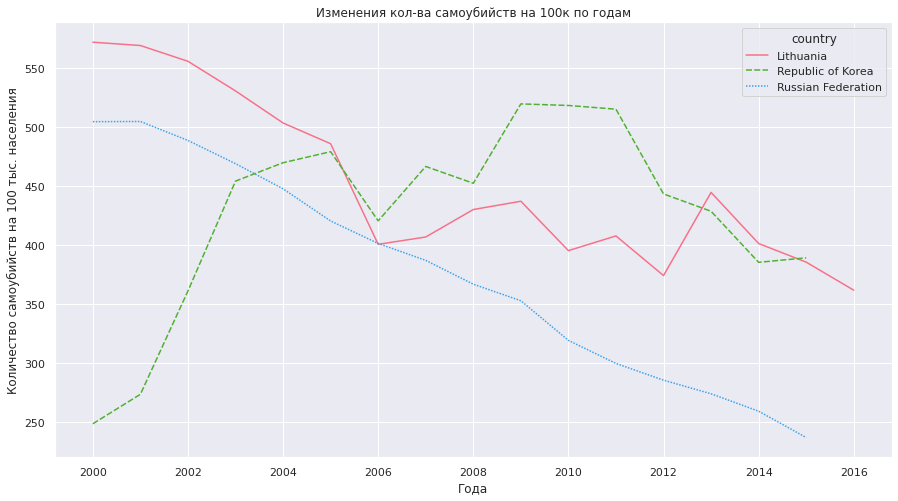

In [ ]:
p2 = sns.lineplot(data=countries_100k, x="year", y="suicides/100k pop", hue="country", style="country",palette="husl")
p2.set_xlabel("Года")
p2.set_ylabel("Количество самоубийств на 100 тыс. населения")
p2.set_title('Изменения кол-ва самоубийств на 100к по годам')

Гипотезу можно частично подтвердить, если согласиться с предположением, что в динамике изменения популяции за 2016 год образовывается выброс  для страны Литва (куда  за один год могло деться 11% населения?). Тогда максимальный отток населения наблюдается в болгарии в 2001 году. В графике изменения самоубийств эта страна не появляется, что частично подтверждает гипотезу.
Если рассматривать график динамики изменения самоубийств на 100 тыс. населения по годам, то гипотеза частично опровергается - Литва является лидером по кол-ву самоубийств в 2001 году, и, при этом, присутсвует в графике оттока популяции

Если же не соглашаться с тем что литва имеет выброс в статистике за 2016 год, то гипотеза полностью опровергается, по причине того что литва в обоих графах занимает первое место  как и по количеству самоубийств, так и по количеству оттока населения

## Гипотеза 13
Количество самоубийств среди девушек возраста от 15 до 24 года в странах Европейского Союза увеличилось в течение 10 лет
`Дмитрий`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


Размах составил 543 смерти.


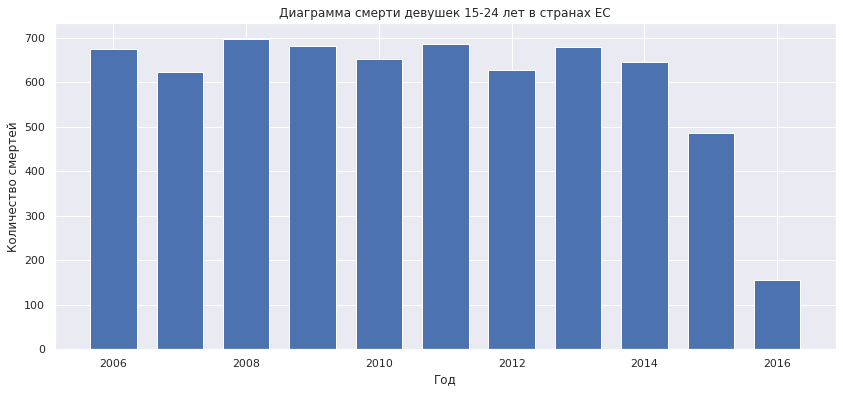

In [ ]:
suicides_13 = suicides.copy()
EU_list = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain","Sweden"]


suicides_13["EU_country_match"] = suicides_13["country"].apply(lambda x: "Match" if x in EU_list else "False")
matched_df = suicides_13.loc[(suicides_13["EU_country_match"] == 'Match') & (suicides_13["age"] == '15-24 years') & (suicides_13["sex"] == 'female')].drop("EU_country_match", 1)

# Отсортируем в течение 10-летнего периода (от 2016)
matched_df['year_diff'] = matched_df['year'].apply(lambda x: "Match" if 2016.0 - x <= 10.0 else "Not")
matched_df = matched_df.loc[matched_df['year_diff'] == 'Match'].drop('year_diff', 1)

# Покажем изменение показателя на столбиковой диаграмме
match = matched_df.groupby('year').agg({'suicides_no': 'sum'})
plt.figure(figsize = (14, 6))
plt.bar(x=match.index, height=match['suicides_no'], width = 0.7)
plt.title("Диаграмма смерти девушек 15-24 лет в странах ЕС")
plt.xlabel("Год")
plt.ylabel("Количество смертей")
print("Размах составил", match["suicides_no"].max() - match["suicides_no"].min(), "смерти.")

Как можно заметить поведение временного промежутка довольно неоднозначно, однако за последние 2 года стандартное отклонение переломило линию тренда.

## Гипотеза 14
Количество самоубийств/100k человек в странах ЕС, совершаемых мужчинами, увеличивается с течением их времени в пределах одного поколения
`Дмитрий`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


Text(0.5, 1.0, 'Количество суицидов/100k среди 5-14 лет')

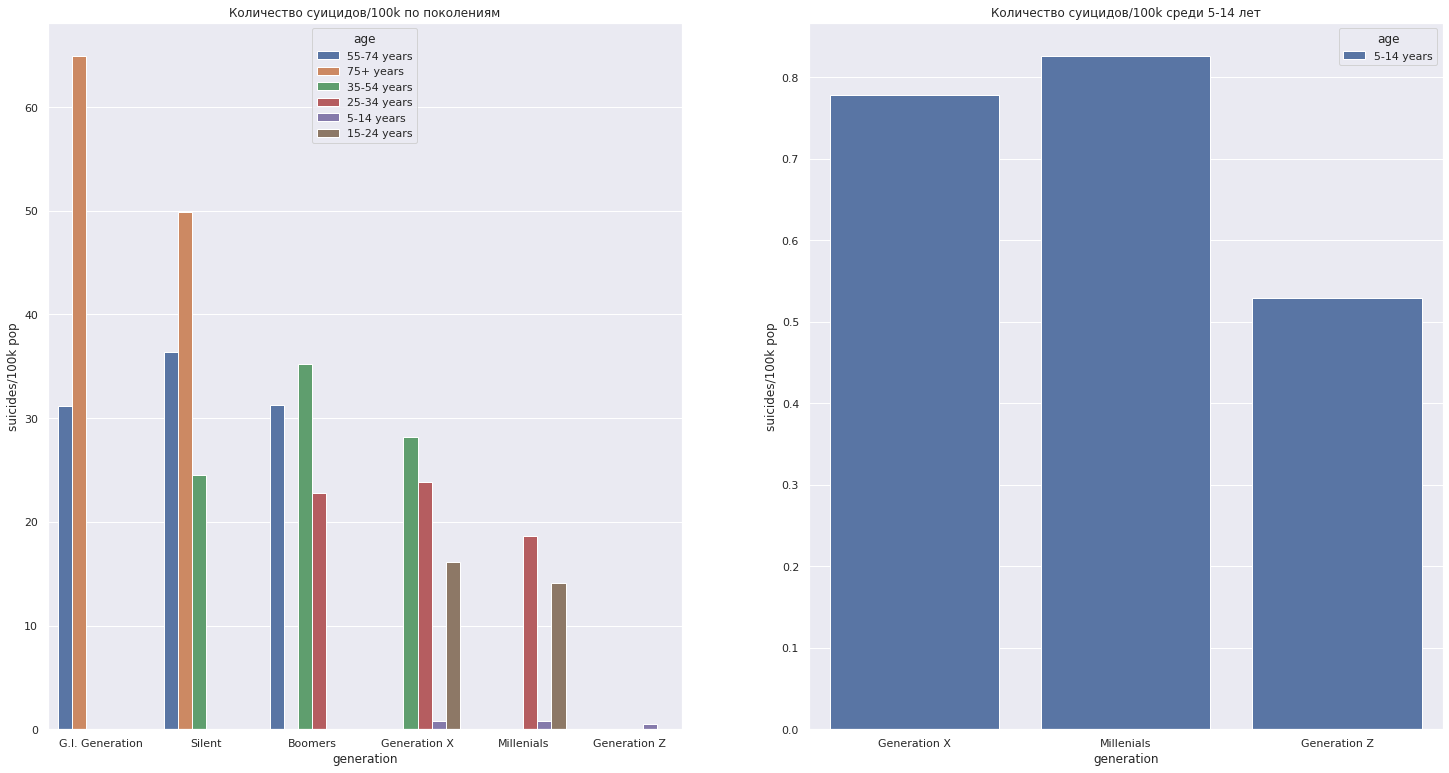

In [ ]:
EU_list = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain","Sweden"]
suicides_14 = suicides.copy()
suicides_14.sample(10)
suicides_14["EU_country_match"] = suicides_14["country"].apply(lambda x: "Match" if x in EU_list else "False")
answer = suicides_14.loc[(suicides_14["EU_country_match"] == 'Match') & (suicides_14["sex"] == 'male')].drop("EU_country_match", 1)
answer = answer.groupby(['generation', 'age']).agg({"suicides/100k pop": 'mean'}).reset_index()
new_df = answer.loc[answer["age"] == '5-14 years']
new_df = new_df.reindex([8, 12, 9])
answer = answer.reindex([3, 4, 13, 14, 15, 0, 1, 2, 8, 5, 6, 7, 12, 10, 11, 9])
fig, axis = plt.subplots(1, 2, figsize=(25, 13))
sns.barplot(ax = axis[0], x="generation", y="suicides/100k pop", hue="age", data=answer).set_title("Количество суицидов/100k по поколениям")
sns.barplot(ax = axis[1], x ='generation', y='suicides/100k pop', hue='age', data=new_df).set_title("Количество суицидов/100k среди 5-14 лет")

Данная информация говорит о том, что самоубийства нового поколения Z ниже данного показателя у миллениалов. 25-34 уменьшается плавно, среди 15-24 такая же тенденция. Выше всего статистика у GI, Silent поколения по суицидам у пожилых людей.

## Гипотеза 15
В более южных странах, в среднем, плотность суицидов превалирует на стороне женщин, а в северных - на стороне мужчин.
`Дмитрий`

Text(0.5, 0, 'Пол')

<Figure size 1440x864 with 0 Axes>

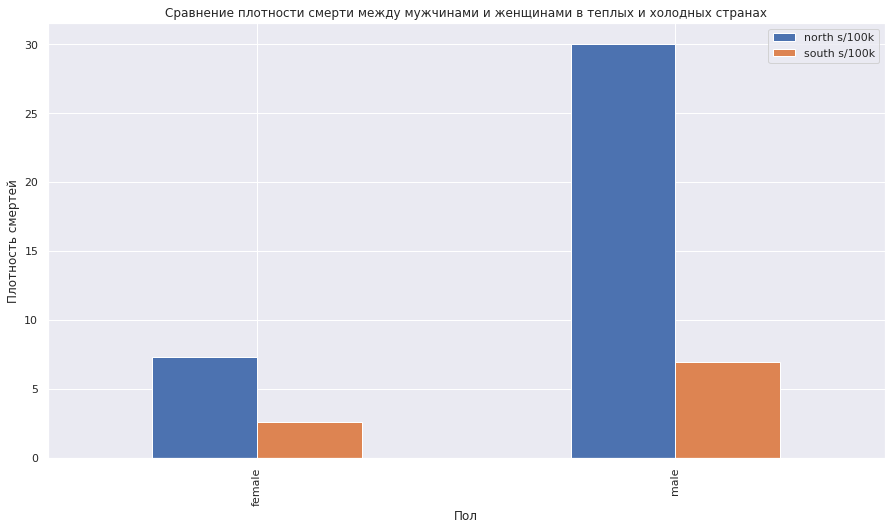

In [ ]:
# Возьмем 5 стран с примерно одинаковым ВВП на душу населения с двух концов света
suicides_15 = suicides.copy()
#print(suicides_15.sample(3))
# Найдем среднеисторический ВВП
average_gdp = suicides_15.groupby("country").agg({"gdp_per_capita " : "mean"})

poor_df = average_gdp.loc[(average_gdp['gdp_per_capita '] >= 0) & (average_gdp['gdp_per_capita '] <= 5000)]
normal_df = average_gdp.loc[(average_gdp["gdp_per_capita "] >= 5001) & (average_gdp["gdp_per_capita "] <= 15000.0)]
rich_df = average_gdp.loc[(average_gdp["gdp_per_capita "] >= 15001) & (average_gdp["gdp_per_capita "] <= 35000.0)]
gold_df = average_gdp.loc[average_gdp["gdp_per_capita "] >= 35001]

poor_s = ["Thailand"]
poor_n = ["Mongolia"]

normal_s = ["Maldives"]
normal_n = ["Estonia"]

rich_s = ["Israel"]
rich_n = ["New Zealand"]

gold_s = ["Qatar"]
gold_n = ["Sweden"]

d_p = suicides_15.groupby(['country', 'sex']).agg({"suicides/100k pop": "mean"}).reset_index()
south_list = d_p.loc[(d_p['country'] == "Thailand") | (d_p['country'] == "Maldives") | (d_p['country'] == "Israel") | (d_p['country'] == "Qatar")]
north_list = d_p.loc[(d_p['country'] == "Mongolia") | (d_p['country'] == "Estonia") | (d_p['country'] == "New Zealand") | (d_p['country'] == "Sweden")]
mean_s = south_list.groupby("sex").agg({"suicides/100k pop" : "mean"})
mean_n = north_list.groupby("sex").agg({"suicides/100k pop" : "mean"})
mean_s.rename(columns = {'suicides/100k pop': "south s/100k"}, inplace = True)
mean_n.rename(columns = {'suicides/100k pop': "north s/100k"}, inplace = True)
#df.set_index('key').join(other.set_index('key'))
united = mean_s.join(mean_n).reset_index()

plt.figure(figsize = (20, 12))
united.plot(x="sex", y=["north s/100k", "south s/100k"], kind="bar")
plt.title("Сравнение плотности смерти между мужчинами и женщинами в теплых и холодных странах")
plt.ylabel("Плотность смертей")
plt.xlabel("Пол")

Удивительно, но плотность суицидов в северных стран среди мужчин во много превосходит южные регионы. При этом менее значительно растет данный показатель у женщин

## Гипотеза 16
Cуициды в маленьких странах среди пожилого населения отсутствуют (минимальны)
`Дмитрий`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



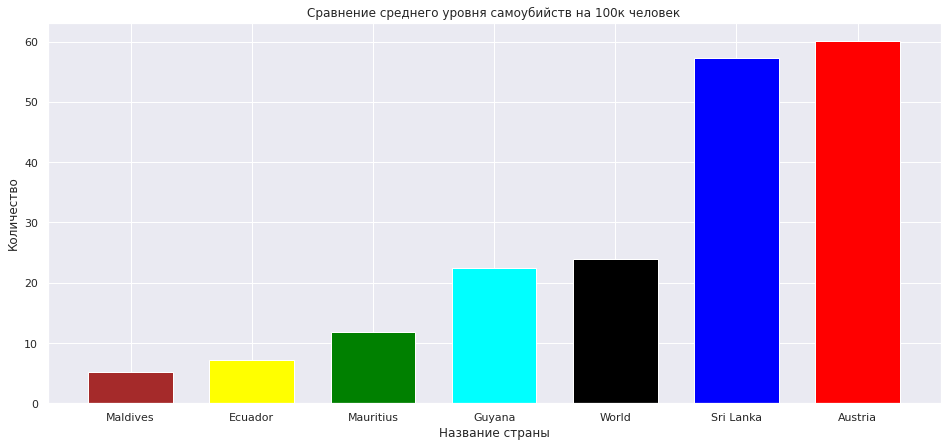

In [ ]:
suicides_16 = suicides.copy()
suicides_16.sample(30)

# Возьмем маленькие страны африки, азии, америки, европы, океании, подсчет в которых ввелся с минимального одинакового года
lt = ["Austria", "Ecuador", "Maldives", "Sri Lanka", "Guyana", "Mauritius", "Fiju"]
suicides_16["small_country_match"] = suicides_16["country"].apply(lambda x: "Match" if x in lt else "False")
answer = suicides_16.loc[(suicides_16["small_country_match"] == 'Match') & (suicides_16["age"] == '75+ years')].drop("small_country_match", 1)
answer = answer.groupby('country').agg({"suicides/100k pop": "mean"}).reset_index()

# Сравним со средним показателем по миру
old_man_world = suicides_16.loc[suicides_16["age"] == '75+ years']

average = old_man_world["suicides/100k pop"].mean()

answer = answer.append({"country": "World", "suicides/100k pop": average}, ignore_index = True).sort_values("suicides/100k pop")

plt.figure(figsize = (16, 7))
plt.bar(x=answer["country"], height=answer["suicides/100k pop"], width=.7, color = ['brown', 'yellow', 'green', 'cyan', 'black', 'blue', 'red'])
plt.title("Сравнение среднего уровня самоубийств на 100к человек")
plt.xlabel("Название страны")
plt.ylabel("Количество");

Как выяснилось, точно определить нельзя, влияет ли размер страны и количество ее население решающим фактором для суицида лиц 75+ лет. Островные государства также не принадлежат этой логике в рамках нашего анализа. Стоит добавить, что в Австрии разрешена эвтаназия, поэтому всех людей, решившихся на нее, приписывают к суицидальному исходу жизни.

# Бонус


In [ ]:
suicide_b=suicides.copy()
suicide_b = suicide_b.groupby(by='country', as_index = False).sum()[['country', 'suicides_no']]

fig = px.choropleth(suicide_b, 
                    locations='country',
                    locationmode = 'country names', # говорит о том, что берем полные названия стран
                    color='suicides_no',
                    color_continuous_scale=px.colors.sequential.Burg,
                    labels={'country':'Страна', 'suicides_no':'Количество самоубийств (1985-2016)'}
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()